### Suport Vektor Machine  mit Sklearn


von Eric Hirsch und Jonas Morsch 

### Einbinden alle benötigten Bibliotehken 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

import Data_preparation as DP

DP=DP.Data_preparation()


from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error

### Einlesen des Datensatzes 

In [9]:
df=DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)# Anzeigen aller features und Labels 
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
#df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)# Aufteilen der Daten in Trainings und Testdaten 
df.head()

Index(['Rel_BreitGross', 'RelSpitze_oben', 'RelSpitze_unten', 'Anzahl_Linie',
       'Anzahl_Ecken', 'Anzahl_Kreis', 'innere_Konturen', 'Label'],
      dtype='object')
training set size: 564 samples 
test set size: 241 samples


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,innere_Konturen,Label
0,0.288606,0.074919,0.618893,6,1,0,0.716694,0
1,0.494050,0.685185,0.634259,5,7,0,0.163891,0
2,0.497540,0.986384,0.989410,15,8,0,0.169400,0
3,0.480687,0.714286,0.592262,21,6,0,0.085573,0
4,0.322937,0.159763,0.633136,21,3,0,0.038672,0


### Erstellen des Suport Vector Machine Modesl und trainiern des Models

In [10]:
model=SVC()
model.fit(X_train.values,y_train.values.ravel())

SVC()

In [11]:
pred=model.predict(X_test.values)

              precision    recall  f1-score   support

           0       0.56      0.37      0.44        68
           1       0.58      0.64      0.61        85
           2       0.54      0.64      0.59        88

    accuracy                           0.56       241
   macro avg       0.56      0.55      0.55       241
weighted avg       0.56      0.56      0.55       241

Mean squarred Error: 0.942319905859604
Confusion matrix
[[25 19 24]
 [ 8 54 23]
 [12 20 56]]


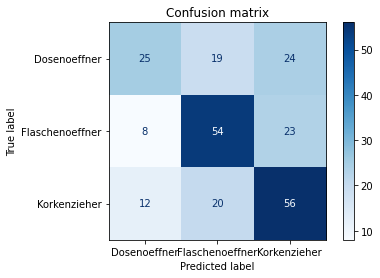

In [13]:
print(metrics.classification_report(y_test.values,pred))
np.set_printoptions(precision=2) # only to digits after the dot 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# name the classes 

rms=mean_squared_error(y_test,pred,squared=False)

print("Mean squarred Error:",rms)

### create a confusion Matrix 
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)

In [ ]:
random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
prediction=model.predict(X_test.values[random_index].reshape(1,-1))# ein zufälligesd Bild Vorhersagen 
print("Class predictet by Naive Bayes: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet by Naive Bayes: [2]
actual Class: Label    1
Name: 464, dtype: int64 
